# ERT - Basic inversion

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt

# Inversion

In [2]:
ert = pg.physics.ERTManager(sr=False, useBert=True, verbose=True, debug=False)

In [3]:
data = pg.DataContainerERT('./data/Eugies_ERT.txt')
data.set('k', pg.physics.ert.createGeometricFactors(data))
data.set('rhoa', data('r')*data('k'))
data.set('err',ert.estimateError(data,absoluteError=0.001,relativeError=0.02))
data.checkDataValidity()
data.removeInvalid()
data.save('./data/Eugies_ERT.dat', 'a b m n rhoa err k')

20/05/21 - 09:52:36 - pyGIMLi - INFO - Cache /home/su530201/miniconda3/envs/pg/lib/python3.7/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 2): /home/su530201/.cache/pygimli/13455931871205019889


1

20/05/21 - 09:52:36 - pyGIMLi - INFO - Found 2 regions.
20/05/21 - 09:52:36 - pyGIMLi - INFO - Region with smallest marker (1) set to background
20/05/21 - 09:52:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/05/21 - 09:52:36 - Core - WARNING - Region Nr: 1  is background and should not get a model transformation.
20/05/21 - 09:52:36 - Core - WARNING - Region Nr: 1  is background and should not get a model control.
20/05/21 - 09:52:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/05/21 - 09:52:36 - pyGIMLi - INFO - Starting inversion.
20/05/21 - 09:52:36 - pyGIMLi - INFO - Set default startmodel to median(data values)=39.2283496253657
20/05/21 - 09:52:36 - pyGIMLi - INFO - Created startmodel from forward operator: 428 [39.2283496253657,...,39.2283496253657]


fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7fa9ece607f0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7fa9ece608f0>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x7fa9ece60870>
min/max (data): 19.22/107
min/max (error): 2.00%/2.01%
min/max (start model): 39.23/39.23
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 12.29 (dPhi = 90.12%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4.91 (dPhi = 53.66%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.66 (dPhi = 63.51%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.66)                   #
############################

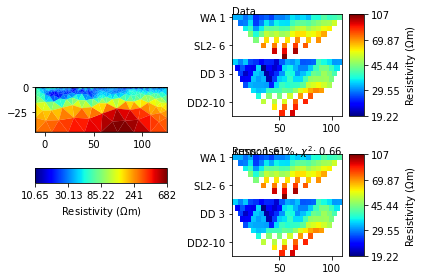

In [4]:
# Run the ERTManager to invert the modeled data.
# The necessary inversion mesh is generated automatically.
model = ert.invert(data=data, paraDX=0.25, maxCellArea=10.0, lam=10)
chi2 = ert.inv.chi2()
print(chi2)
# Let the ERTManger show you the model and fitting results of the last
# successful run.
# Show data, model response, and model
ert.showResultAndFit(cMap='jet');

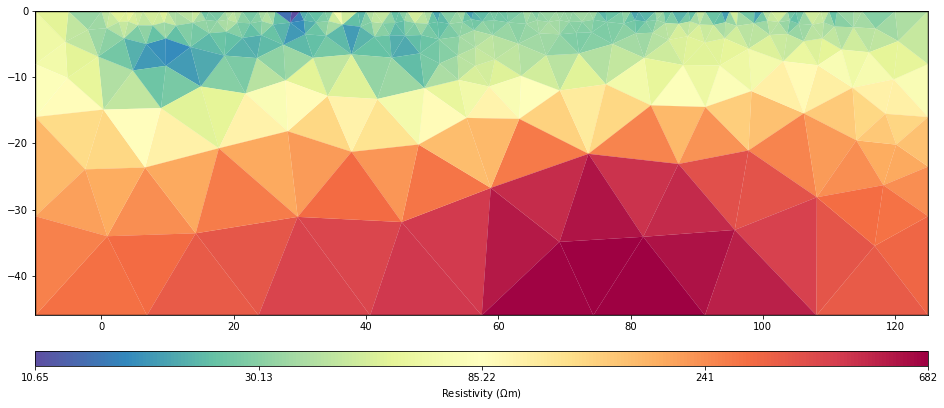

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
ax, cbar = ert.showModel(model, ax=ax)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9e80f2150>,
 <matplotlib.colorbar.Colorbar at 0x7fa9e02febd0>)

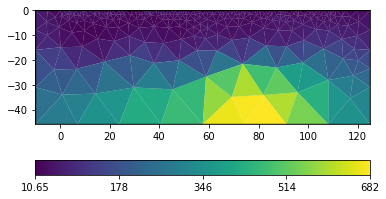

In [6]:
pg.show(ert.paraDomain, ert.paraModel())

## Display with coverage

(-70.0, 0.0)

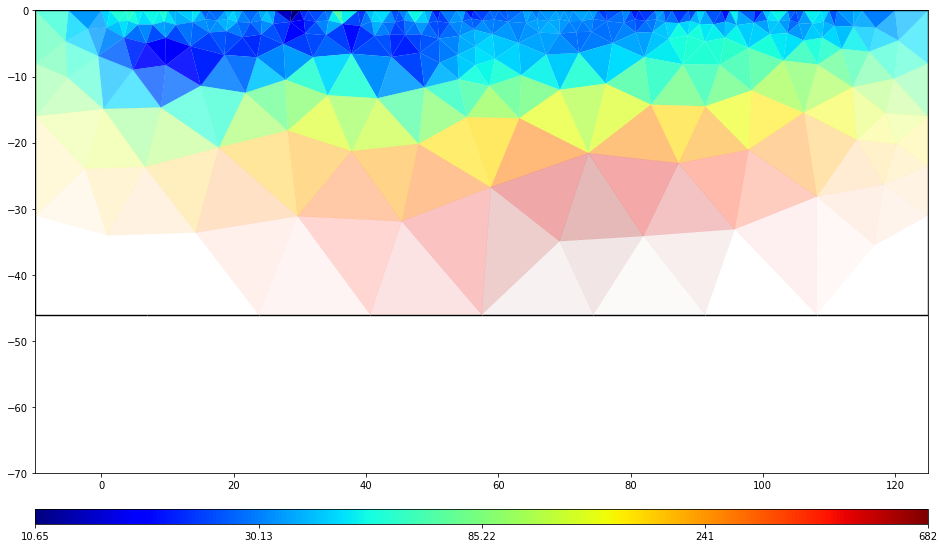

In [7]:
fig, ax = plt.subplots(figsize=(16,10))
pg.viewer.showMesh(mesh=ert.paraDomain, data = model, markers=False, coverage=ert.coverage(), cMap='jet', logScale=True, ax=ax)
ax.set_ylim([-70, 0])